In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import inearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
#from keras.models import Sequential
#from keras.layers import Dense

In [2]:
albedo_top_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\mercury-albedo-top-half.png.csv",header=None)

In [3]:
albedo_top_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,0.486275,0.498039,0.521569,0.529412,0.541176,0.596078,0.643137,0.678431,0.686275,0.698039,...,0.509804,0.552941,0.600000,0.600000,0.584314,0.552941,0.501961,0.478431,0.474510,0.474510
1,0.486275,0.498039,0.521569,0.529412,0.541176,0.596078,0.643137,0.678431,0.686275,0.698039,...,0.509804,0.552941,0.600000,0.600000,0.584314,0.552941,0.501961,0.478431,0.474510,0.474510
2,0.027451,0.019608,0.011765,0.007843,0.003922,0.003922,0.007843,0.019608,0.031373,0.035294,...,0.015686,0.019608,0.011765,0.011765,0.015686,0.023529,0.015686,0.019608,0.019608,0.031373
3,0.027451,0.019608,0.011765,0.007843,0.003922,0.003922,0.007843,0.019608,0.031373,0.035294,...,0.015686,0.019608,0.011765,0.011765,0.015686,0.023529,0.015686,0.019608,0.019608,0.031373
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
albedo_top_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.396427,0.394325,0.391678,0.385904,0.385261,0.380229,0.381144,0.380784,0.376122,0.376601,...,0.411688,0.408704,0.405207,0.400022,0.402952,0.401688,0.403322,0.400479,0.397342,0.401797
std,0.115433,0.110688,0.105231,0.097998,0.097741,0.101651,0.100978,0.104517,0.106795,0.106535,...,0.120430,0.124439,0.127068,0.126736,0.129505,0.134696,0.134036,0.124164,0.119342,0.124844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.329412,0.333333,0.333333,0.329412,0.329412,0.321569,0.325490,0.325490,0.317647,0.317647,...,0.344118,0.341176,0.337255,0.337255,0.337255,0.325490,0.329412,0.324510,0.324510,0.328431
50%,0.384314,0.384314,0.388235,0.384314,0.388235,0.380392,0.384314,0.384314,0.372549,0.372549,...,0.403922,0.398039,0.392157,0.386275,0.388235,0.386275,0.384314,0.390196,0.388235,0.388235
75%,0.454902,0.447059,0.451961,0.451961,0.447059,0.436275,0.439216,0.436275,0.435294,0.435294,...,0.466667,0.462745,0.450980,0.444118,0.450980,0.447059,0.462745,0.454902,0.450980,0.454902
max,0.847059,0.850980,0.737255,0.631373,0.737255,0.741176,0.737255,0.749020,0.749020,0.768627,...,0.741176,0.831373,0.854902,0.792157,0.839216,0.901961,0.909804,0.874510,0.835294,0.921569


<AxesSubplot:>

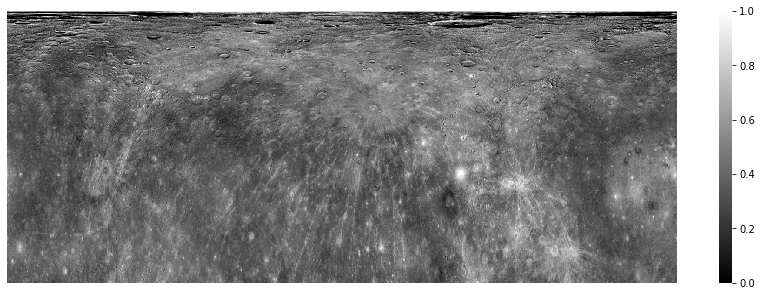

In [5]:
plt.subplots(figsize=(15,5))
sns.heatmap(albedo_top_data,xticklabels=False,yticklabels=False,cmap='gray')

In [6]:
albedo_top_data.shape

(720, 1440)

In [7]:
scale_al_top=StandardScaler()
scaled_top=scale_al_top.fit_transform(albedo_top_data)

In [8]:
albedo_bottom_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\mercury-albedo-resized-bottom-half.png.csv",header=None)

<AxesSubplot:>

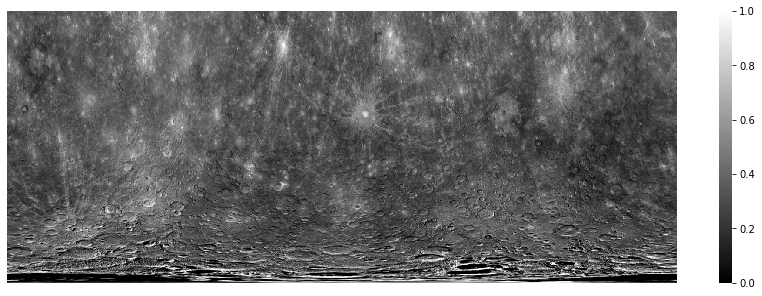

In [9]:
plt.subplots(figsize=(15,5))
sns.heatmap(albedo_bottom_data,xticklabels=False,yticklabels=False,cmap='gray')

In [10]:
albedo_bottom_data.shape

(720, 1440)

In [11]:
mgsi_map_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\mgsimap_smooth_032015.png.csv",header=None)
mgsi_map_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.485016,0.485289,0.485528,0.485795,0.485234,0.484722,0.484897,0.485871,0.486068,0.486280,...,0.480191,0.480452,0.480779,0.480997,0.482119,0.482446,0.482865,0.483170,0.483497,0.483813
std,0.110547,0.110530,0.110478,0.110411,0.111816,0.113262,0.113268,0.111801,0.111829,0.111882,...,0.113883,0.113765,0.113674,0.113639,0.112285,0.112227,0.112165,0.112118,0.112070,0.112037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.450980,0.450980,0.454902,0.454902,0.454902,0.450980,0.450980,0.450980,0.450980,0.450980,...,0.443137,0.443137,0.443137,0.443137,0.443137,0.442157,0.443137,0.447059,0.447059,0.447059
50%,0.513726,0.513726,0.513726,0.513726,0.513726,0.513726,0.513726,0.513726,0.513726,0.513726,...,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.509804,0.513726,0.513726,0.513726
75%,0.552941,0.552941,0.552941,0.552941,0.552941,0.552941,0.550000,0.549020,0.549020,0.549020,...,0.552941,0.552941,0.552941,0.552941,0.552941,0.552941,0.552941,0.552941,0.552941,0.552941
max,0.619608,0.615686,0.615686,0.611765,0.611765,0.607843,0.607843,0.603922,0.600000,0.600000,...,0.615686,0.615686,0.611765,0.611765,0.611765,0.607843,0.607843,0.607843,0.603922,0.603922


<AxesSubplot:>

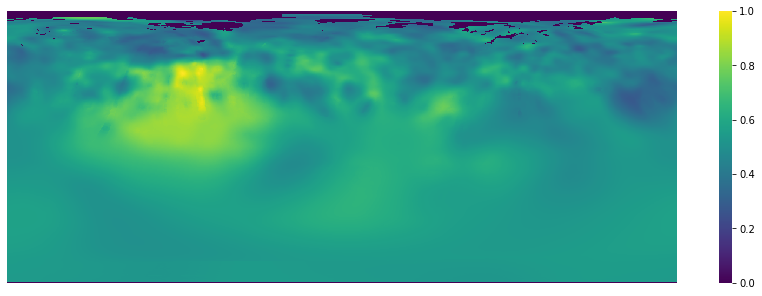

In [12]:
plt.subplots(figsize=(15,5))
sns.heatmap(mgsi_map_data,xticklabels=False,yticklabels=False,cmap='viridis')

In [13]:
mgsi_map_data.shape

(720, 1440)

In [14]:
alsi_map_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\\alsimap_smooth_032015.png.csv",header=None)

<AxesSubplot:>

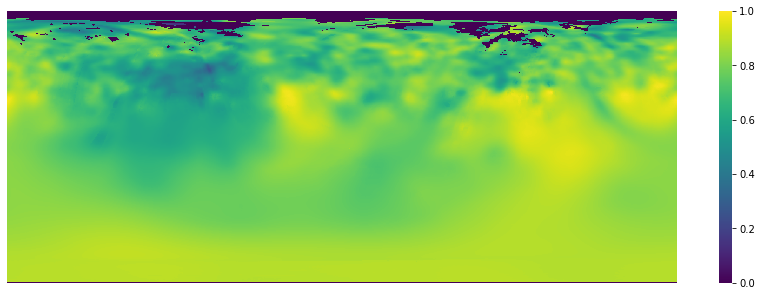

In [15]:
plt.subplots(figsize=(15,5))
sns.heatmap(alsi_map_data,xticklabels=False,yticklabels=False,cmap='viridis')

In [16]:
ssi_map_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\\ssimap_smooth_032015.png.csv",header=None)

<AxesSubplot:>

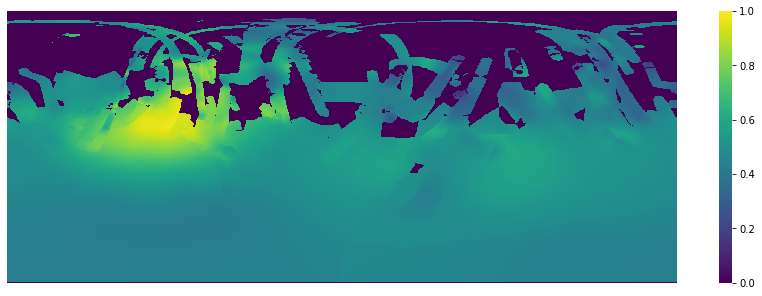

In [17]:
plt.subplots(figsize=(15,5))
sns.heatmap(ssi_map_data,xticklabels=False,yticklabels=False,cmap='viridis')

In [18]:
casi_map_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\\casimap_smooth_032015.png.csv",header=None)

<AxesSubplot:>

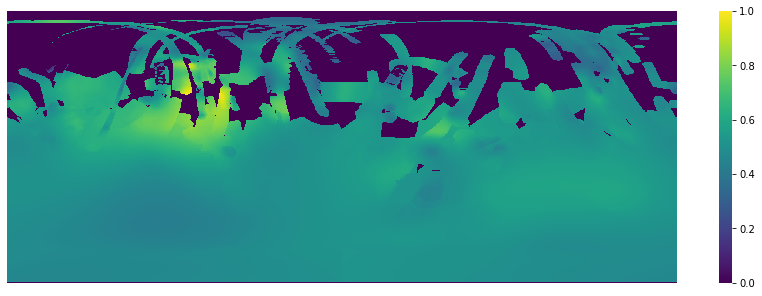

In [19]:
plt.subplots(figsize=(15,5))
sns.heatmap(casi_map_data,xticklabels=False,yticklabels=False,cmap='viridis')

In [20]:
fesi_map_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\\fesimap_smooth_032015.png.csv",header=None)

<AxesSubplot:>

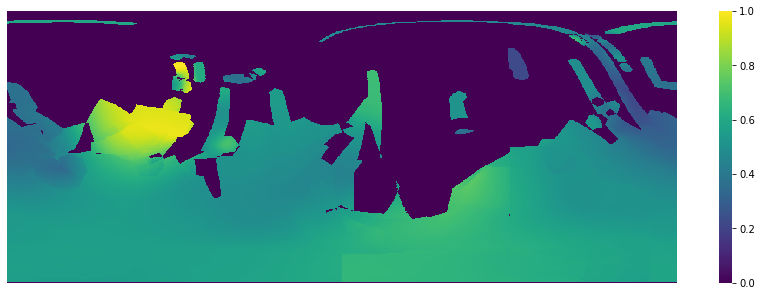

In [21]:
plt.subplots(figsize=(15,5))
sns.heatmap(fesi_map_data,xticklabels=False,yticklabels=False,cmap='viridis')

In [22]:
def divider(data):
    upper=data.iloc[0:360,:].values
    lower=data.iloc[360:720,:].values
    return upper,lower

In [23]:
mgsi_upper,mgsi_lower=divider(mgsi_map_data)
alsi_upper,alsi_lower=divider(alsi_map_data)
ssi_upper,ssi_lower=divider(ssi_map_data)
casi_upper,casi_lower=divider(casi_map_data)
fesi_upper,fesi_lower=divider(fesi_map_data)

In [24]:
chemical_map_data=np.dstack((mgsi_upper,alsi_upper,ssi_upper,casi_upper,fesi_upper))

In [25]:
chemical_map_data.shape

(360, 1440, 5)

In [26]:
mgsi_lower.shape

(360, 1440)

In [27]:
# this is the function for converting every dataset into a column vector.
def column_converter(data):
    column_arr=data.reshape(-1,1,order='F') # here order='F' specifies that it will read column vice
    return column_arr
# returned value will be a column vector of type ndarray

In [28]:
def resizer(data):
    res = cv2.resize(data, dsize=(1440,360), interpolation=cv2.INTER_CUBIC)
    return res

In [29]:
upper_albedo_resized=resizer(albedo_top_data.values)

In [30]:
upper_albedo_resized.shape

(360, 1440)

<AxesSubplot:>

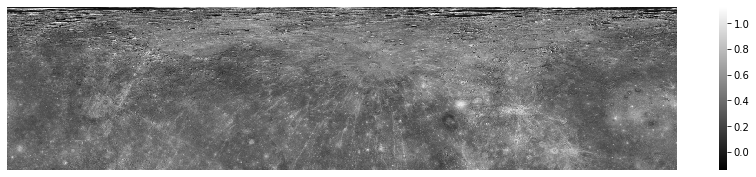

In [31]:
plt.subplots(figsize=(15,3))
sns.heatmap(upper_albedo_resized,xticklabels=False,yticklabels=False,cmap='gray')

In [32]:
def padder(dataset,padding_size):
    y,x=dataset.shape
    row_vector=np.zeros((padding_size,x))
    column_vector=np.zeros((y+2*padding_size,padding_size))
    dataset1=np.vstack((row_vector,dataset,row_vector))
    dataset2=np.hstack((column_vector,dataset1,column_vector))
    return dataset2

In [33]:
padded_upper_albedo=padder(upper_albedo_resized,2)

In [34]:
padded_upper_albedo.shape

(364, 1444)

In [35]:
img_hg,img_wd=padded_upper_albedo.shape
x_data=[]
y_data=[]
filter_size=5
for i in range(2,img_hg-2):
    for j in range(2,img_wd-2):
        k=i-2
        l=j-2
        albedo_patch=padded_upper_albedo[k:k+filter_size,l:l+filter_size]
        x_data.append(albedo_patch)
        chem_pixals=chemical_map_data[k,l,:]
        y_data.append(chem_pixals)
x_data_array=np.asarray(x_data)
y_data_array=np.array(y_data)
        

In [36]:
x_data_array.shape

(518400, 5, 5)

In [37]:
x_data_array=x_data_array.reshape(-1,5,5,1) #making it 4-d tensor.

In [38]:
x_data_array.shape

(518400, 5, 5, 1)

In [39]:
y_data_array.shape

(518400, 5)

In [40]:
360*1440

518400

In [41]:
bottom_albedo_resized=resizer(albedo_bottom_data.values)

padded_bottom_albedo=padder(bottom_albedo_resized,2)

padded_bottom_albedo.shape

chemical_bottom_map=np.dstack((mgsi_lower,alsi_lower,ssi_lower,casi_lower,fesi_lower))

img_hg,img_wd=padded_bottom_albedo.shape
x_test=[]
y_test=[]
filter_size=5
for i in range(2,img_hg-2):
    for j in range(2,img_wd-2):
        k=i-2
        l=j-2
        bottom_patch=padded_bottom_albedo[k:k+filter_size,l:l+filter_size]
        x_test.append(bottom_patch)
        bottom_pixals=chemical_bottom_map[k,l,:]
        y_test.append(bottom_pixals)
x_test_array=np.asarray(x_test)
y_test_array=np.array(y_test)

In [42]:
from tensorflow import keras
from keras import layers

In [43]:
input_shape=(5,5,1)
model=keras.Sequential()
model.add(layers.Input(shape=input_shape))
model.add(layers.Conv2D(6, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(12, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(24, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(80))
model.add(keras.layers.Dropout(0.15))
model.add(layers.Dense(5))


In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 5, 5, 6)           60        
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 12)          660       
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 24)          2616      
                                                                 
 batch_normalization (BatchN  (None, 5, 5, 24)         96        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 5, 5, 24)          0         
                                                                 
 activation (Activation)     (None, 5, 5, 24)          0         
                                                        

In [45]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=keras.losses.mean_squared_error, optimizer=adam,metrics=[keras.metrics.MeanSquaredError(),'acc'])

c:\users\danger-one\appdata\local\programs\python\python38\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [46]:
history=model.fit(x_data_array, y_data_array, batch_size=128, epochs=150,validation_split=0.1)

Epoch 1/150
3645/3645 [==============================] - 30s 8ms/step - loss: 0.0561 - mean_squared_error: 0.0561 - acc: 0.7343 - val_loss: 0.0642 - val_mean_squared_error: 0.0642 - val_acc: 0.7194
Epoch 2/150
3645/3645 [==============================] - 29s 8ms/step - loss: 0.0501 - mean_squared_error: 0.0501 - acc: 0.7411 - val_loss: 0.0741 - val_mean_squared_error: 0.0741 - val_acc: 0.7169
Epoch 3/150
3645/3645 [==============================] - 29s 8ms/step - loss: 0.0493 - mean_squared_error: 0.0493 - acc: 0.7426 - val_loss: 0.0642 - val_mean_squared_error: 0.0642 - val_acc: 0.7318
Epoch 4/150
3645/3645 [==============================] - 29s 8ms/step - loss: 0.0489 - mean_squared_error: 0.0489 - acc: 0.7430 - val_loss: 0.0716 - val_mean_squared_error: 0.0716 - val_acc: 0.7340
Epoch 5/150
3645/3645 [==============================] - 29s 8ms/step - loss: 0.0487 - mean_squared_error: 0.0487 - acc: 0.7427 - val_loss: 0.0598 - val_mean_squared_error: 0.0598 - val_acc: 0.7364
Epoch 6/15

3645/3645 [==============================] - 30s 8ms/step - loss: 0.0476 - mean_squared_error: 0.0476 - acc: 0.7439 - val_loss: 0.0684 - val_mean_squared_error: 0.0684 - val_acc: 0.7166
Epoch 84/150
3645/3645 [==============================] - 30s 8ms/step - loss: 0.0476 - mean_squared_error: 0.0476 - acc: 0.7435 - val_loss: 0.0656 - val_mean_squared_error: 0.0656 - val_acc: 0.7345
Epoch 85/150
3645/3645 [==============================] - 32s 9ms/step - loss: 0.0476 - mean_squared_error: 0.0476 - acc: 0.7436 - val_loss: 0.0674 - val_mean_squared_error: 0.0674 - val_acc: 0.7320
Epoch 86/150
3645/3645 [==============================] - 32s 9ms/step - loss: 0.0476 - mean_squared_error: 0.0476 - acc: 0.7437 - val_loss: 0.0628 - val_mean_squared_error: 0.0628 - val_acc: 0.7339
Epoch 87/150
3645/3645 [==============================] - 31s 8ms/step - loss: 0.0476 - mean_squared_error: 0.0476 - acc: 0.7436 - val_loss: 0.0644 - val_mean_squared_error: 0.0644 - val_acc: 0.7143
Epoch 88/150
3645/

In [47]:
pred_val=model.predict(x_test_array)

In [48]:
mse=np.sum((pred_val-y_test_array)**2)/x_test_array.size

In [49]:
mse

0.01816023941356161

In [83]:
mgsi_clmn=pred_val[:,0]

In [84]:
mgsi_clmn.shape

(518400,)

In [85]:
mgsi_bottom=mgsi_clmn.reshape(360,-1)

<AxesSubplot:>

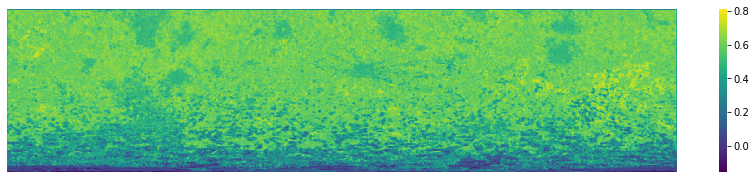

In [86]:
plt.subplots(figsize=(15,3))
sns.heatmap(mgsi_bottom,xticklabels=False,yticklabels=False,cmap='viridis')

## Metric for Results

In [77]:
import math
import numpy as np


def ssim(img1, img2):
    C1 = (0.01 * 1)**2
    C2 = (0.03 * 1)**2

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()


def calculate_ssim(img1, img2):
    '''calculate SSIM
    the same outputs as MATLAB's
    img1, img2: [0, 1]
    '''
    if not img1.shape == img2.shape:
        raise ValueError('Input images must have the same dimensions.')
    if img1.ndim == 2:
        return ssim(img1, img2)
    elif img1.ndim == 3:
        if img1.shape[2] == 3:
            ssims = []
            for i in range(3):
                ssims.append(ssim(img1, img2))
            return np.array(ssims).mean()
        elif img1.shape[2] == 1:
            return ssim(np.squeeze(img1), np.squeeze(img2))
    else:
        raise ValueError('Wrong input image dimensions.')

In [78]:


def calculate_psnr(img1, img2):
    # img1 and img2 have range [0, 255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(1.0 / math.sqrt(mse))

In [79]:
def perf_calc(img1,img2):
    psnr=calculate_psnr(img1,img2)
    ssim=calculate_ssim(img1,img2)
    print('psnr:'+str(psnr))
    print('ssim:'+str(ssim))

In [80]:
chem=['mgsi','alsi','ssi','casi','fesi']

In [82]:
for i in range(5):
    org=y_test_array[:,i]
    pred=pred_val[:,i]
    org_img=org.reshape(360,-1)
    pred_img=pred.reshape(360,-1)
    print('Metric evaluation for chemical map of '+chem[i]+' bottom surface')
    perf_calc(org_img,pred_img)
    

Metric evaluation for chemical map of mgsi bottom surface
psnr:16.72986178465952
ssim:0.43256177572195226
Metric evaluation for chemical map of alsi bottom surface
psnr:10.302893879859402
ssim:0.4021440955835258
Metric evaluation for chemical map of ssi bottom surface
psnr:11.962652447976286
ssim:0.2481361327182512
Metric evaluation for chemical map of casi bottom surface
psnr:11.570308117935664
ssim:0.24910951734989992
Metric evaluation for chemical map of fesi bottom surface
psnr:6.856877089984884
ssim:0.15464950901563224
